# Visualizing the Interactions Life Cycle

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
plt.style.use('fivethirtyeight')
import seaborn as sns

In [3]:
# File Path
file_path = "../New_DB.xlsx"

# Read all sheets into a dictionary of DataFrames
all_sheets = pd.read_excel(file_path, skiprows=1, sheet_name=None)

# Access each DataFrame by sheet name
life = all_sheets["Vida Post"]
life_x_cs = life[["Xcomments", "XRts", "Xlikes", "Days.1"]].copy()
life_x_xg = life[["Xcomments.1", "XRts.1", "Xlikes.1", "Days.1"]].copy()
life_x_av = life[["Xcomments.2", "XRts.2", "Xlikes.2", "Days.1"]].copy()

In [4]:
life_x_cs

,Xcomments,XRts,Xlikes,Days.1
0,632,1000,2500,1
1,636,1000,2700,2
2,651,1000,2700,3
3,652,1000,2700,4
4,654,1000,2700,5
5,654,1000,2700,6


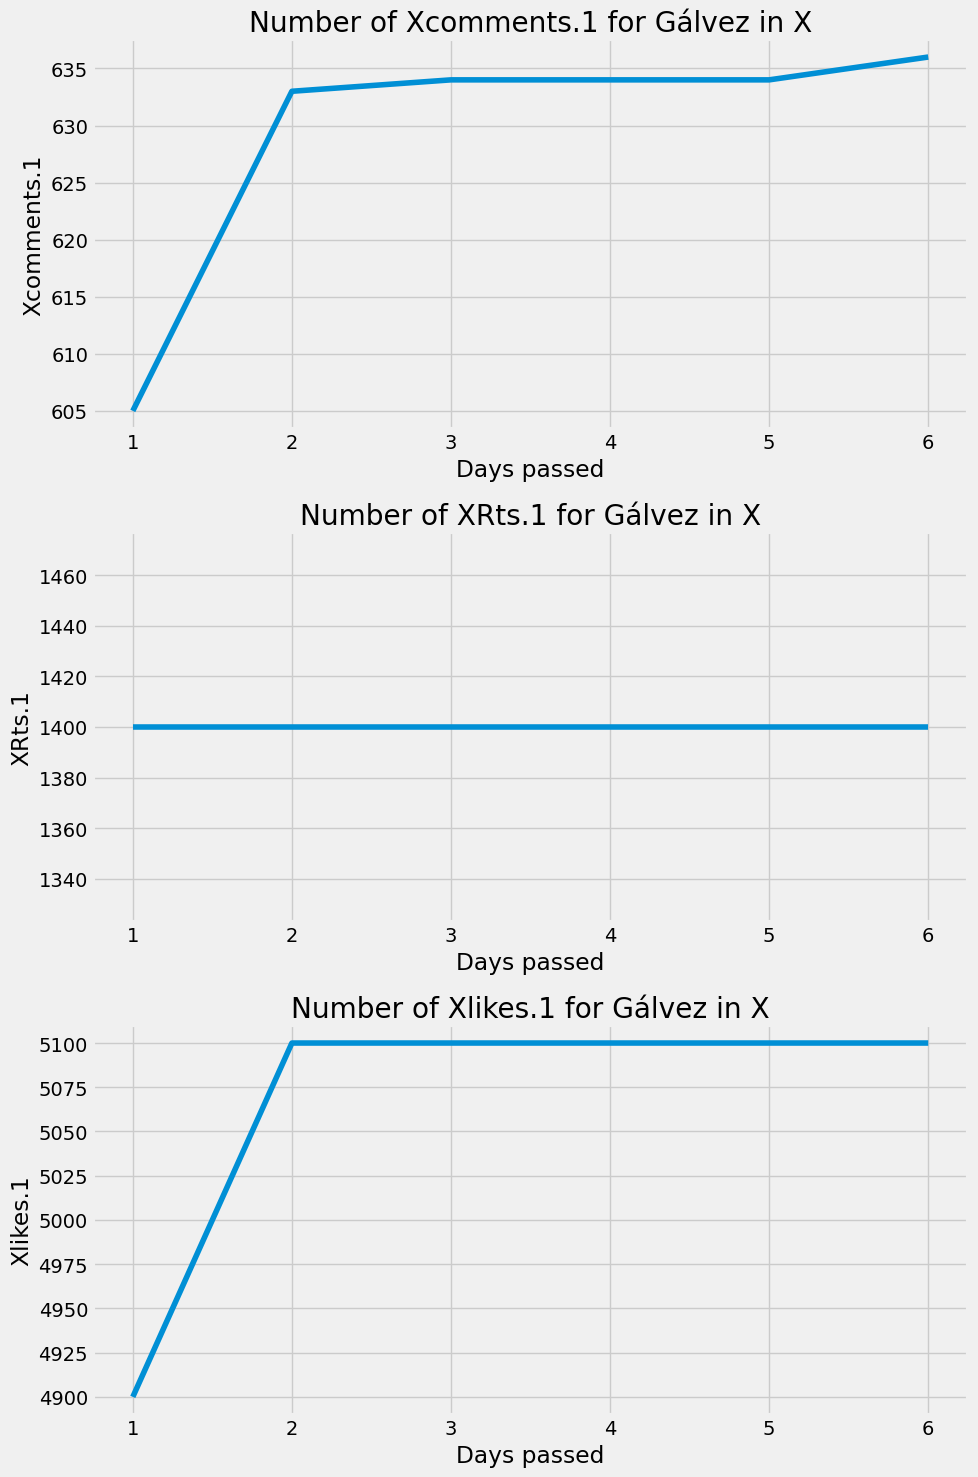

In [5]:
metrics = ["Xcomments.1", "XRts.1", "Xlikes.1"]
# Create subplots with 3 rows and 1 column
fig, axs = plt.subplots(3, 1, figsize=(10, 15))
for i, v in enumerate(metrics):
  # Select the current subplot
  ax = axs[i]
  ax.plot(life_x_xg["Days.1"], life_x_xg[v]) 

  # Set labels and title for the current subplot
  ax.set_title(f"Number of {v} for Gálvez in X")
  ax.set_ylabel(f"{v}")
  ax.set_xlabel("Days passed")
# Adjust layout to prevent overlapping
plt.tight_layout()

plt.show();

# Visualizing the State of the Polls

In [6]:
# File Path
file_path = "../New_DB.xlsx"

# Read all sheets into a dictionary of DataFrames
polls = pd.read_excel(file_path, sheet_name="Polls")
polls = polls[["Encuestadora","XG", "CS", "JAM", "Diff1v2", "Diff2v3", "Month"]]

In [7]:
polls.head()

,Encuestadora,XG,CS,JAM,Diff1v2,Diff2v3,Month
0,Simo,25,60,3,35,22,2
1,Mitofsky,28,52,5,24,23,2
2,El Financiero,33,50,8,17,25,2
3,Demotecnia,15,67,2,52,13,2
4,Buendía & Márquez,28,47,4,19,24,2


## Plotting the Differences among the Candidates

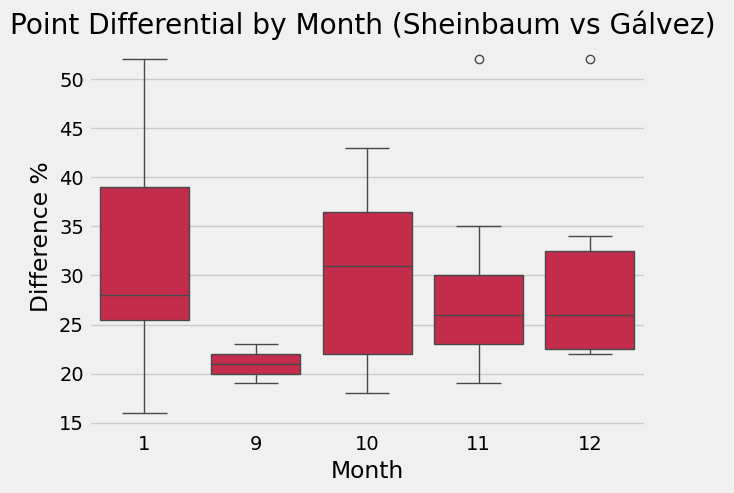

In [9]:
# Use seaborn for a more concise syntax
month_order = [1, 9,10,11,12]
# Set a specific color for the boxes
boxplot_color = "crimson"
sns.boxplot(x="Month", y="Diff1v2", data=polls, order=month_order, color=boxplot_color)
# Set labels and title
plt.xlabel("Month")
plt.ylabel("Difference %")
plt.title("Point Differential by Month (Sheinbaum vs Gálvez) ")
# Rotate x-axis labels for better visibility (optional)
plt.xticks(rotation=0)
plt.show();

## Plotting the Canidates Single Voting Preference

In [10]:
polls.head(10)

,Encuestadora,XG,CS,JAM,Diff1v2,Diff2v3,Month
0,Simo,25,60,3,35,22,2
1,Mitofsky,28,52,5,24,23,2
2,El Financiero,33,50,8,17,25,2
3,Demotecnia,15,67,2,52,13,2
4,Buendía & Márquez,28,47,4,19,24,2
5,Berumen,27,54,5,27,22,2
6,Simo,22,63,4,41,18,1
7,Mitofsky,27,51,5,24,22,1
8,Mendoza Blanco & Asoc,24,61,5,37,19,1
9,Enkoll,27,55,2,28,25,1


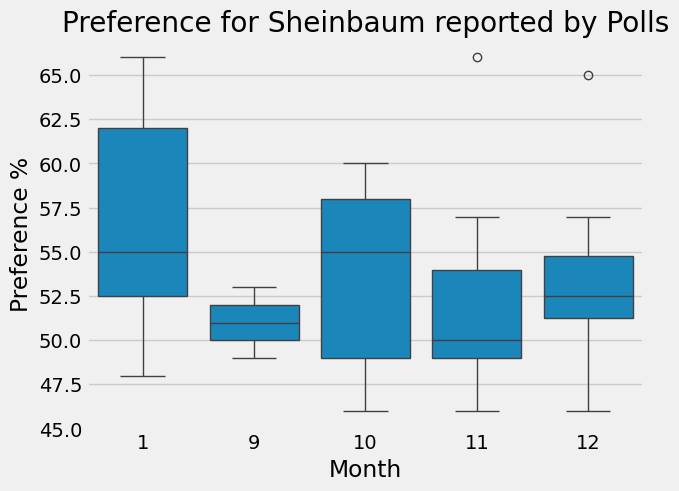

In [12]:
# Use seaborn for a more concise syntax
month_order = [1,9,10,11,12]
sns.boxplot(x="Month", y="CS", data=polls, order=month_order)
# Set labels and title
plt.xlabel("Month")
plt.ylabel("Preference %")
plt.title("Preference for Sheinbaum reported by Polls")
# Rotate x-axis labels for better visibility (optional)
plt.xticks(rotation=0)
plt.show();


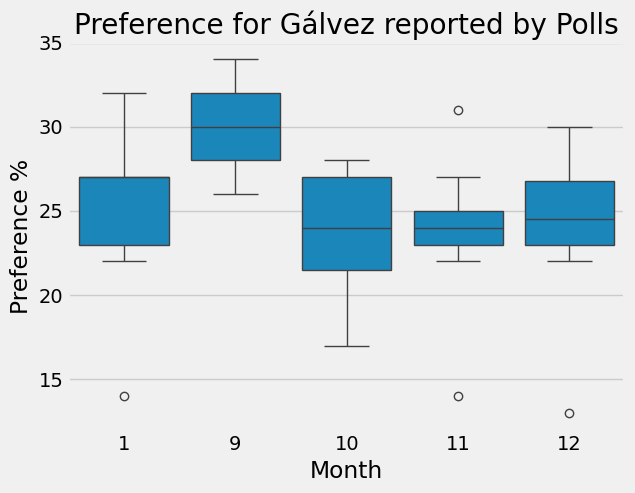

In [13]:
# Use seaborn for a more concise syntax
month_order = [1, 9,10,11,12]
sns.boxplot(x="Month", y="XG", data=polls, order=month_order)
# Set labels and title
plt.xlabel("Month")
plt.ylabel("Preference %")
plt.title("Preference for Gálvez reported by Polls")
# Rotate x-axis labels for better visibility (optional)
plt.xticks(rotation=0)
plt.show();

# Visualizing our Origin Database

## Creating the Databases

In [39]:
# File Path
file_path = "../New_DB.xlsx"

# Read all sheets into a dictionary of DataFrames
all_sheets = pd.read_excel(file_path, skiprows=1, sheet_name=None)

# Access each DataFrame by sheet name
galvez_df = all_sheets["Galvez"]
claudia_df = all_sheets["Claudia"]
maynez_df = all_sheets["Maynez"]

# Convert 'Date' column to datetime if it's not already
galvez_df['Date'] = pd.to_datetime(galvez_df['Date'])
claudia_df['Date'] = pd.to_datetime(claudia_df['Date'])
maynez_df['Date'] = pd.to_datetime(maynez_df['Date'])

# Adding a month column
galvez_df['Month'] = galvez_df['Date'].dt.month
claudia_df['Month'] = claudia_df['Date'].dt.month
maynez_df['Month'] = maynez_df['Date'].dt.month

In [40]:
len(galvez_df), len(claudia_df), len(maynez_df)

(168, 168, 42)

In [41]:
galvez_df = galvez_df[galvez_df['Month'] != 2]
claudia_df = claudia_df[claudia_df['Month'] != 2]
maynez_df = maynez_df[maynez_df['Month'] != 2]


In [42]:
len(galvez_df), len(claudia_df), len(maynez_df)

(147, 147, 21)

## Independent Databases for each App

In [43]:
# DF for Galvez Social Media
Galvez_X = galvez_df[["Date", 'Month', "XPosts", "Xcomments", "XRts", "Xlikes", "XCommsPPost", "XRTsPPost", "XlikesPPost"]].copy()
Galvez_FB = galvez_df[["Date", 'Month', 'FBPosts', 'FBReactions', 'FBComments', "FBShares", "FBReactsPPost", "FBCommsPPost", "FBSharesPPost"]].copy()
Galvez_IG = galvez_df[["Date", 'Month', 'IGPosts', 'IGLikes', 'IGLikesPPost']].copy()
Galvez_Yt = galvez_df[["Date", 'Month', 'YTPosts', 'YTViews', 'YTViewsPPost']].copy()

# Df for Sheinbaum Social Media
Claudia_X = claudia_df[["Date", 'Month', "XPosts", "Xcomments", "XRts", "Xlikes", "XCommsPPost", "XRTsPPost", "XlikesPPost"]].copy()
Claudia_FB = claudia_df[["Date", 'Month', 'FBPosts', 'FBReactions', 'FBComments', "FBShares", "FBReactsPPost", "FBCommsPPost", "FBSharesPPost"]].copy()
Claudia_IG = claudia_df[["Date", 'Month', 'IGPosts', 'IGLikes', 'IGLikesPPost']].copy()
Claudia_Yt = claudia_df[["Date", 'Month', 'YTPosts', 'YTViews', 'YTViewsPPost']].copy()


### Averaging Number of ANY Interaction (Posts, Comments, Likes ...)

In [44]:
# Group by month and calculate the average number of posts
avg_metric_per_month_x_xg = Galvez_X.groupby(Galvez_X['Month'])['Xlikes'].mean()
avg_metric_per_month_fb_xg = Galvez_FB.groupby(Galvez_FB['Month'])['FBReactions'].mean()
avg_metric_per_month_ig_xg = Galvez_IG.groupby(Galvez_IG['Month'])['IGLikes'].mean()
avg_metric_per_month_yt_xg = Galvez_Yt.groupby(Galvez_Yt['Month'])['YTViews'].mean()

# Group by month and calculate the average number of posts
avg_metric_per_month_x_cs = Claudia_X.groupby(Claudia_X['Month'])['Xlikes'].mean()
avg_metric_per_month_fb_cs = Claudia_FB.groupby(Claudia_FB['Month'])['FBReactions'].mean()
avg_metric_per_month_ig_cs = Claudia_IG.groupby(Claudia_IG['Month'])['IGLikes'].mean()
avg_metric_per_month_yt_cs = Claudia_Yt.groupby(Claudia_Yt['Month'])['YTViews'].mean()

### Plots

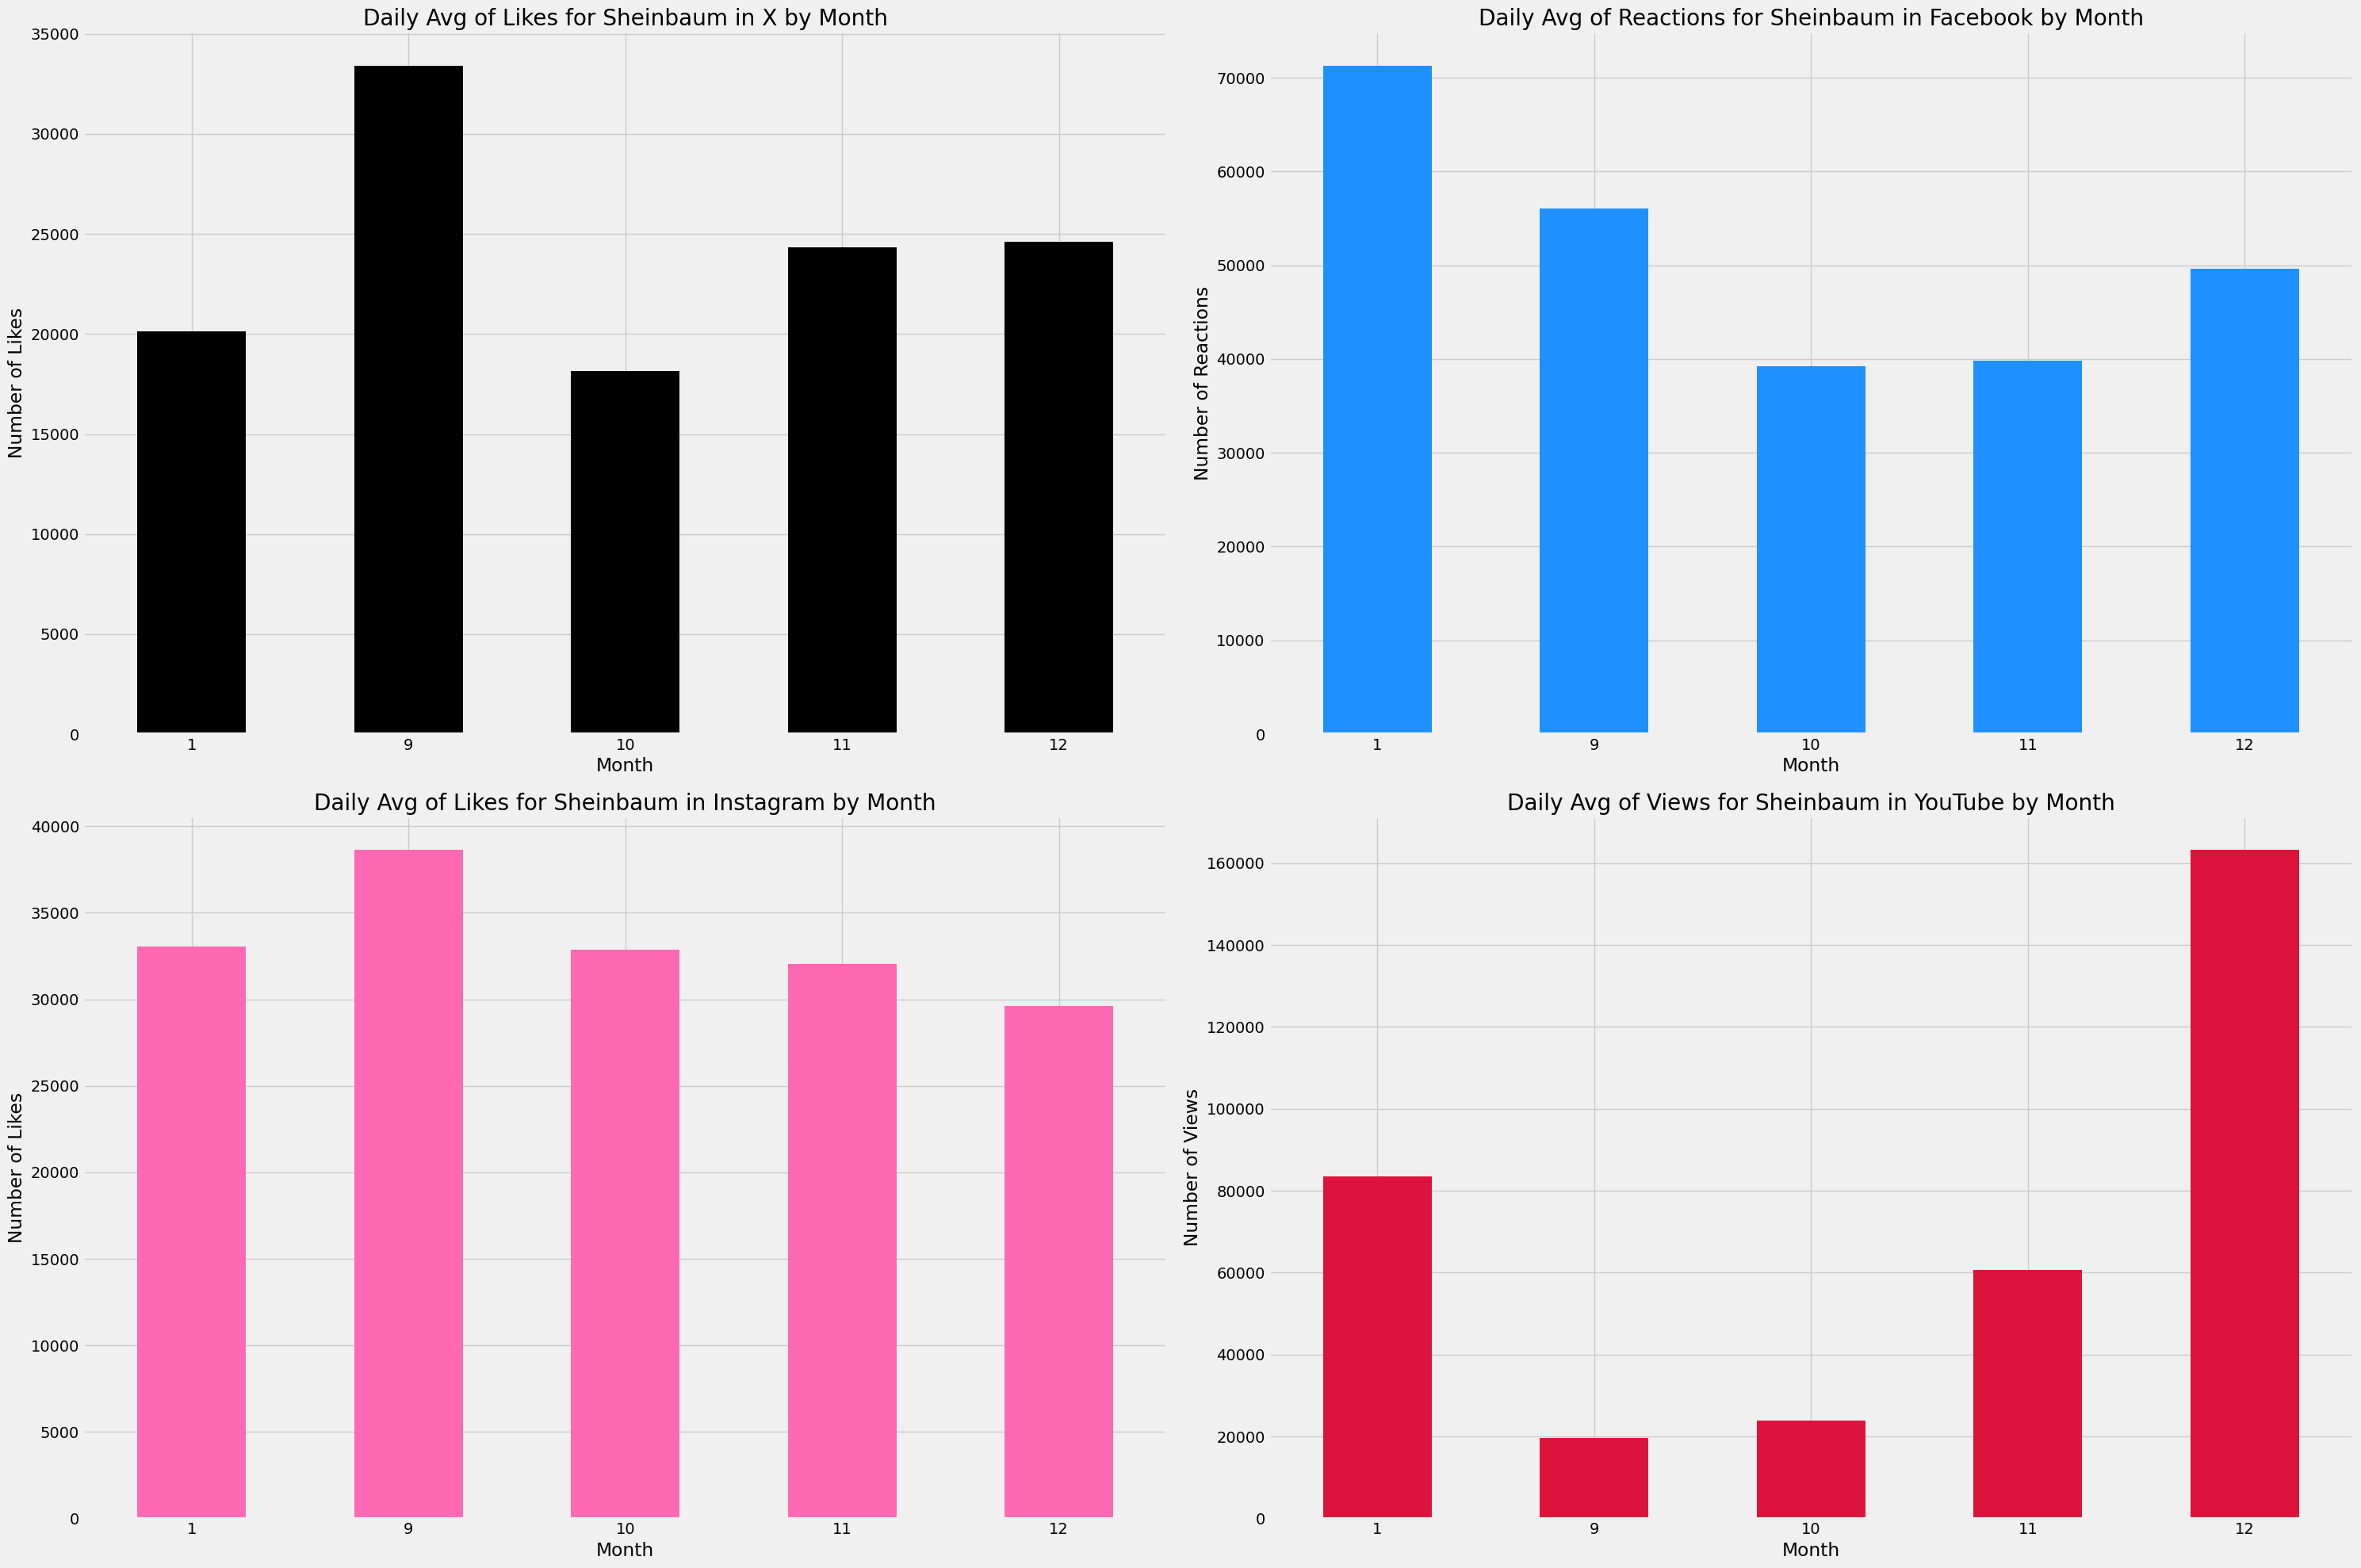

In [45]:
# Create a figure with four subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(30, 20))
metrics = ["Likes", "Reactions", "Likes", "Views"]
# Plot the average number of posts per month in each subplot
colors = ['black', 'dodgerblue', 'hotpink', 'crimson']
dfs = [avg_metric_per_month_x_cs, avg_metric_per_month_fb_cs, avg_metric_per_month_ig_cs, avg_metric_per_month_yt_cs]
networks = ["X", "Facebook", "Instagram", "YouTube"]

for i, ax in enumerate(axes.flatten()):
    dfs[i].plot(kind='bar', color=colors[i], ax=ax)
    ax.set_title(f'Daily Avg of {metrics[i]} for Sheinbaum in {networks[i]} by Month')
    ax.set_xlabel('Month')
    ax.set_ylabel(f'Number of {metrics[i]}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()

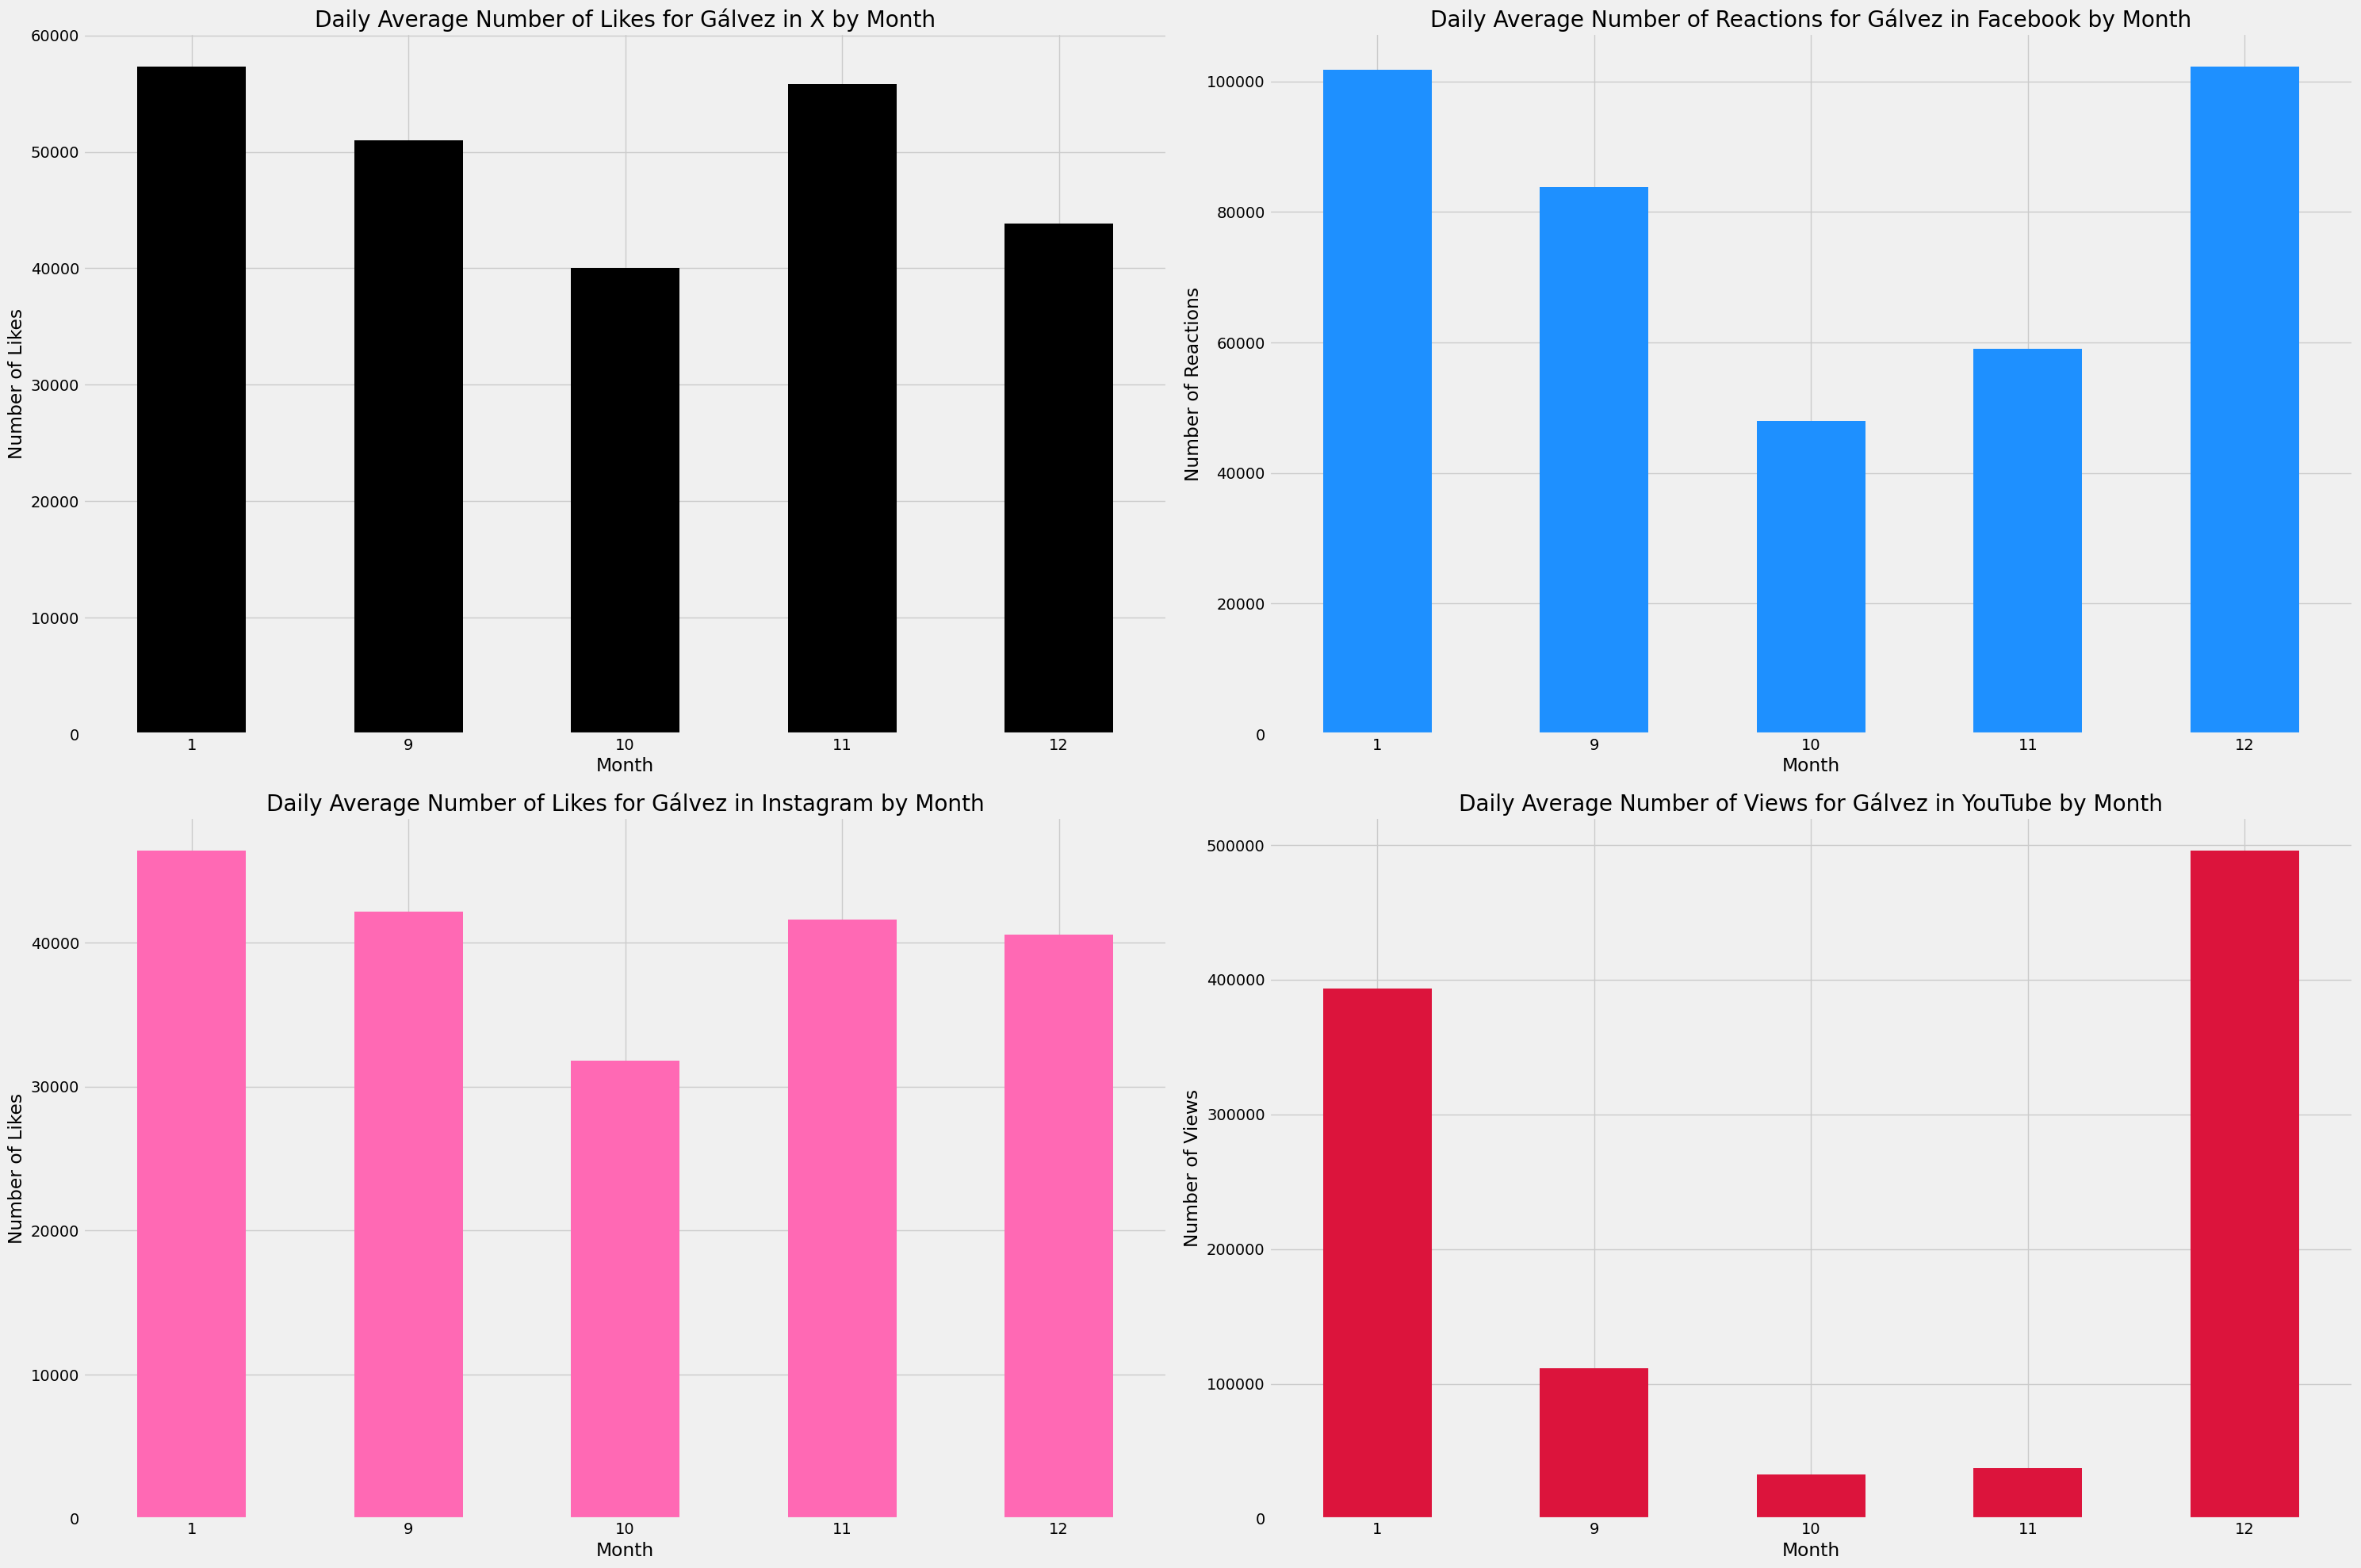

In [46]:
# Create a figure with four subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(30, 20))
metrics = ["Likes", "Reactions", "Likes", "Views"]
# Plot the average number of posts per month in each subplot
colors = ['black', 'dodgerblue', 'hotpink', 'crimson']
dfs = [avg_metric_per_month_x_xg, avg_metric_per_month_fb_xg, avg_metric_per_month_ig_xg, avg_metric_per_month_yt_xg]
networks = ["X", "Facebook", "Instagram", "YouTube"]

for i, ax in enumerate(axes.flatten()):
    dfs[i].plot(kind='bar', color=colors[i], ax=ax)
    ax.set_title(f'Daily Average Number of {metrics[i]} for Gálvez in {networks[i]} by Month')
    ax.set_xlabel('Month')
    ax.set_ylabel(f'Number of {metrics[i]}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()